In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('HR_comma_sep.csv')

# Explorative Data Analysis

In [4]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
df.keys()

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

In [33]:
df.groupby('left').describe()

Work_accident  average_montly_hours  last_evaluation  \
left                                                               
0    count   11428.000000          11428.000000     11428.000000   
     mean        0.175009            199.060203         0.715473   
     std         0.379991             45.682731         0.162005   
     min         0.000000             96.000000         0.360000   
     25%         0.000000            162.000000         0.580000   
     50%         0.000000            198.000000         0.710000   
     75%         0.000000            238.000000         0.850000   
     max         1.000000            287.000000         1.000000   
1    count    3571.000000           3571.000000      3571.000000   
     mean        0.047326            207.419210         0.718113   
     std         0.212364             61.202825         0.197673   
     min         0.000000            126.000000         0.450000   
     25%         0.000000            146.000000         0.520000   
     50%         0.000000            224.000000         0.790000   
     75%         0.000000            262.000000         0.900000   
     max         1.000000            310.000000         1.000000   

            number_project  promotion_last_5years  satisfaction_level  \
left                                                                    
0    count    11428.000000           11428.000000        11428.000000   
     mean         3.786664               0.026251            0.666810   
     std          0.979884               0.159889            0.217104   
     min          2.000000               0.000000            0.120000   
     25%          3.000000               0.000000            0.540000   
     50%          4.000000               0.000000            0.690000   
     75%          4.000000               0.000000            0.840000   
     max          6.000000               1.000000            1.000000   
1    count     3571.000000            3571.000000         3571.000000   
     mean         3.855503               0.005321            0.440098   
     std          1.818165               0.072759            0.263933   
     min          2.000000               0.000000            0.090000   
     25%          2.000000               0.000000            0.130000   
     50%          4.000000               0.000000            0.410000   
     75%          6.000000               0.000000            0.730000   
     max          7.000000               1.000000            0.920000   

            time_spend_company  
left                            
0    count        11428.000000  
     mean             3.380032  
     std              1.562348  
     min              2.000000  
     25%              2.000000  
     50%              3.000000  
     75%              4.000000  
     max             10.000000  
1    count         3571.000000  
     mean             3.876505  
     std              0.977698  
     min              2.000000  
     25%              3.000000  
     50%              4.000000  
     75%              5.000000  
     max              6.000000

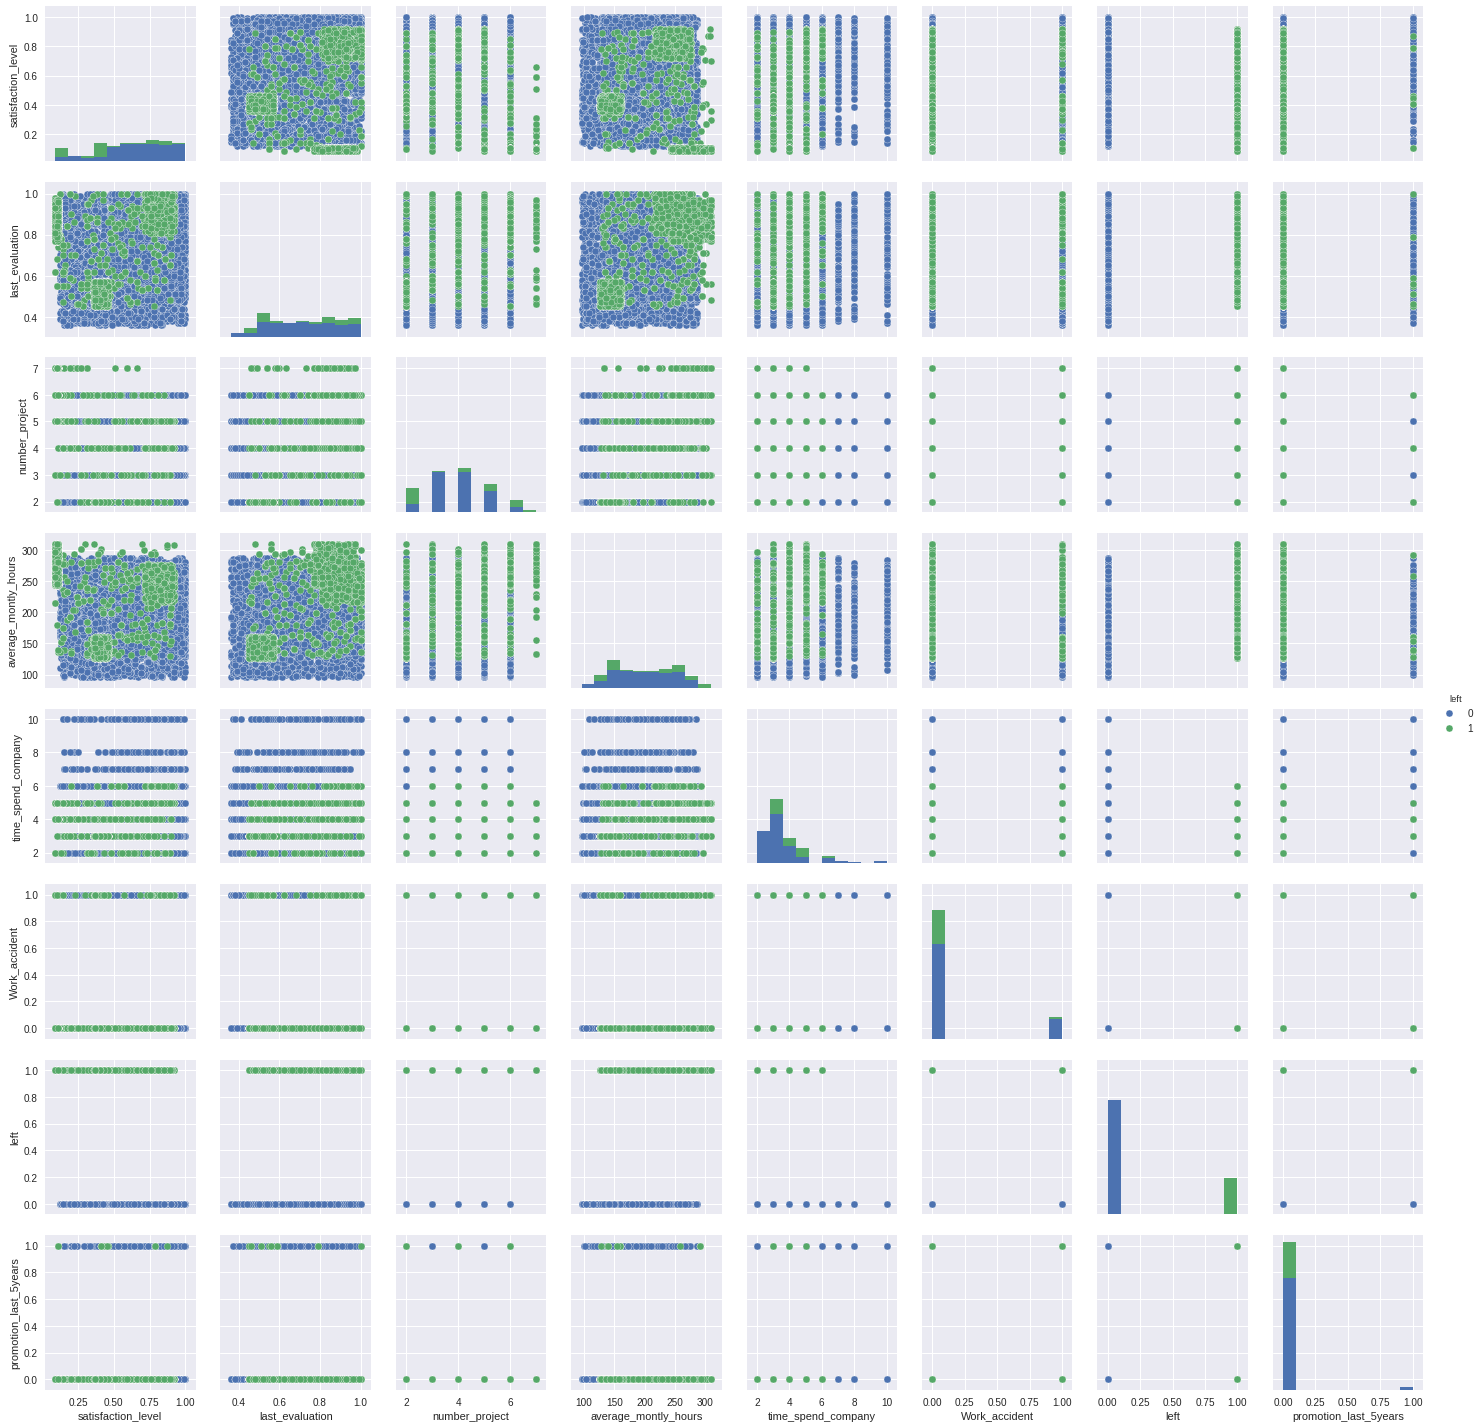

In [101]:
sns.pairplot(df, hue='left')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


/home/kunkler/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


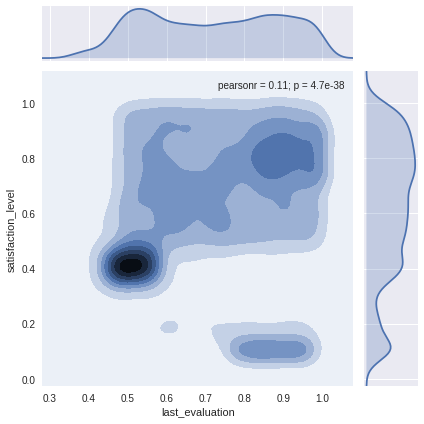

In [86]:
sns.jointplot(x=df['last_evaluation'], y=df['satisfaction_level'], kind='kde')

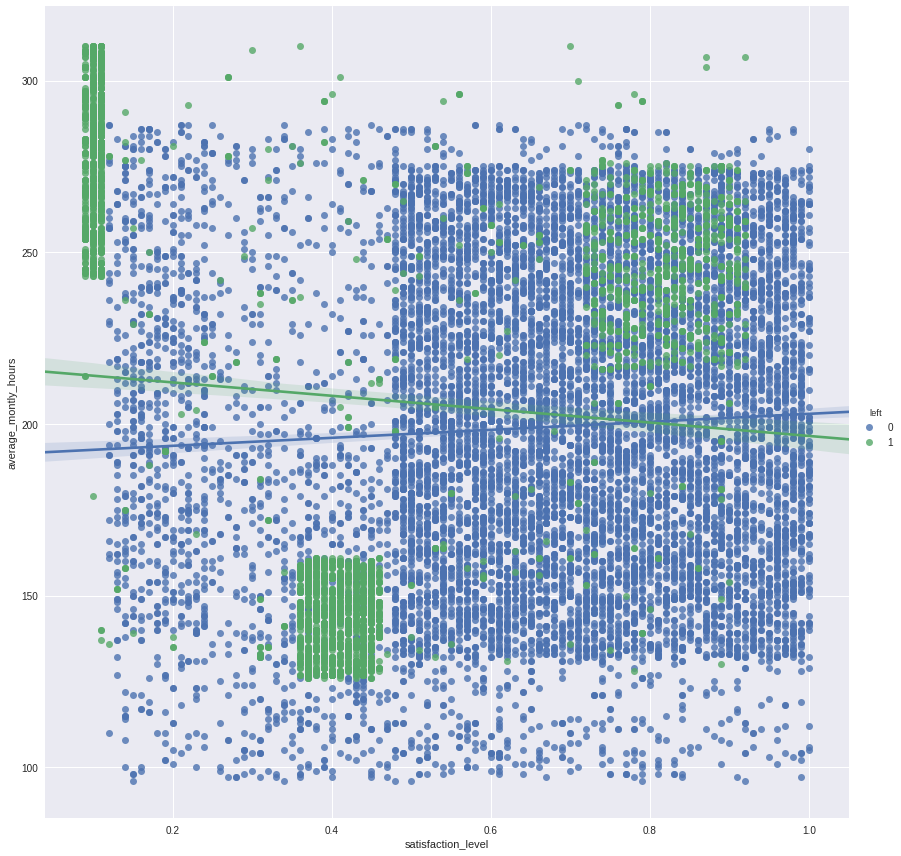

In [28]:
sns.lmplot(data=df, x='satisfaction_level', y='average_montly_hours', size=12, hue='left')

# Data Transformation

In [46]:
sal_dummy = pd.get_dummies(df['salary'])
df_new = pd.concat([df, sal_dummy], axis=1)

In [47]:
df_new.drop('salary', axis=1, inplace=True)

In [48]:
df_new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,high,low,medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [52]:
X = df_new.drop(['sales', 'left', 'high'], axis=1)
y = df_new['left']

# Data Predictions

## Random Forest Classifier

In [53]:
from sklearn.cross_validation import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc = RandomForestClassifier(n_estimators=100)

In [57]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [58]:
pred = rfc.predict(X_test)

In [59]:
from sklearn.metrics import confusion_matrix, classification_report

In [61]:
print(confusion_matrix(y_test, pred))
print('\n')
print(classification_report(y_test, pred))

[[3760    9]
 [  48 1133]]


             precision    recall  f1-score   support

          0       0.99      1.00      0.99      3769
          1       0.99      0.96      0.98      1181

avg / total       0.99      0.99      0.99      4950



## K Nearest Neighbors Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors=10)

In [77]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [78]:
knn_pred = knn.predict(X_test)

In [79]:
print(confusion_matrix(y_test, knn_pred))
print('\n')
print(classification_report(y_test, knn_pred))

[[3586  183]
 [ 109 1072]]


             precision    recall  f1-score   support

          0       0.97      0.95      0.96      3769
          1       0.85      0.91      0.88      1181

avg / total       0.94      0.94      0.94      4950



## Logistic Regression

In [95]:
from sklearn.linear_model import LogisticRegression

In [96]:
lreg = LogisticRegression()

In [97]:
lreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
reg_pred = lreg.predict(X_test)

In [100]:
print(confusion_matrix(y_test, reg_pred))
print('\n')
print(classification_report(y_test, reg_pred))

[[3480  289]
 [ 810  371]]


             precision    recall  f1-score   support

          0       0.81      0.92      0.86      3769
          1       0.56      0.31      0.40      1181

avg / total       0.75      0.78      0.75      4950

